In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df  = pd.read_csv('../data/raw/indian_liver_patient.csv')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.shape

(583, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.Gender.replace({'Male':1,'Female':0},inplace = True)

C:\Users\Asghar Qambar Rizvi\AppData\Local\Temp\ipykernel_10244\3479150997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace({'Male':1,'Female':0},inplace = True)
C:\Users\Asghar Qambar Rizvi\AppData\Local\Temp\ipykernel_10244\3479150997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [15]:
df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(),inplace = True)

C:\Users\Asghar Qambar Rizvi\AppData\Local\Temp\ipykernel_10244\3279857656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(),inplace = True)


In [16]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [17]:
df.Dataset.unique()

array([1, 2])

In [19]:
# 1  = NOT Suffering 
# 2 = SUffering

In [20]:
df.Dataset.replace({1:0, 2:1},inplace=True)

C:\Users\Asghar Qambar Rizvi\AppData\Local\Temp\ipykernel_10244\4137528265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Dataset.replace({1:0, 2:1},inplace=True)


In [21]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


C:\Users\Asghar Qambar Rizvi\AppData\Local\Temp\ipykernel_10244\443295439.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x = 'Dataset',palette='Set1')


<Axes: xlabel='Dataset', ylabel='count'>

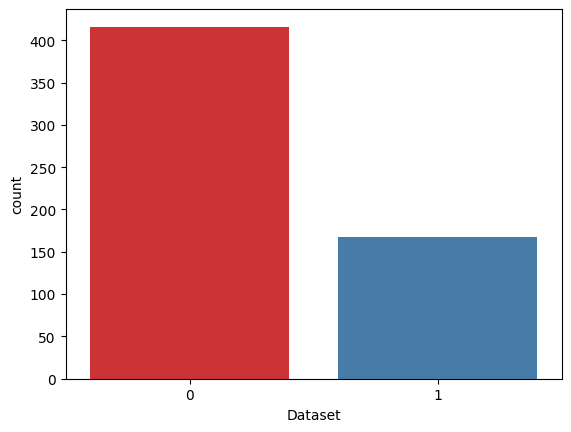

In [25]:
sns.countplot(data =df, x = 'Dataset',palette='Set1')

In [26]:
# here the data is imbalanced

<Axes: >

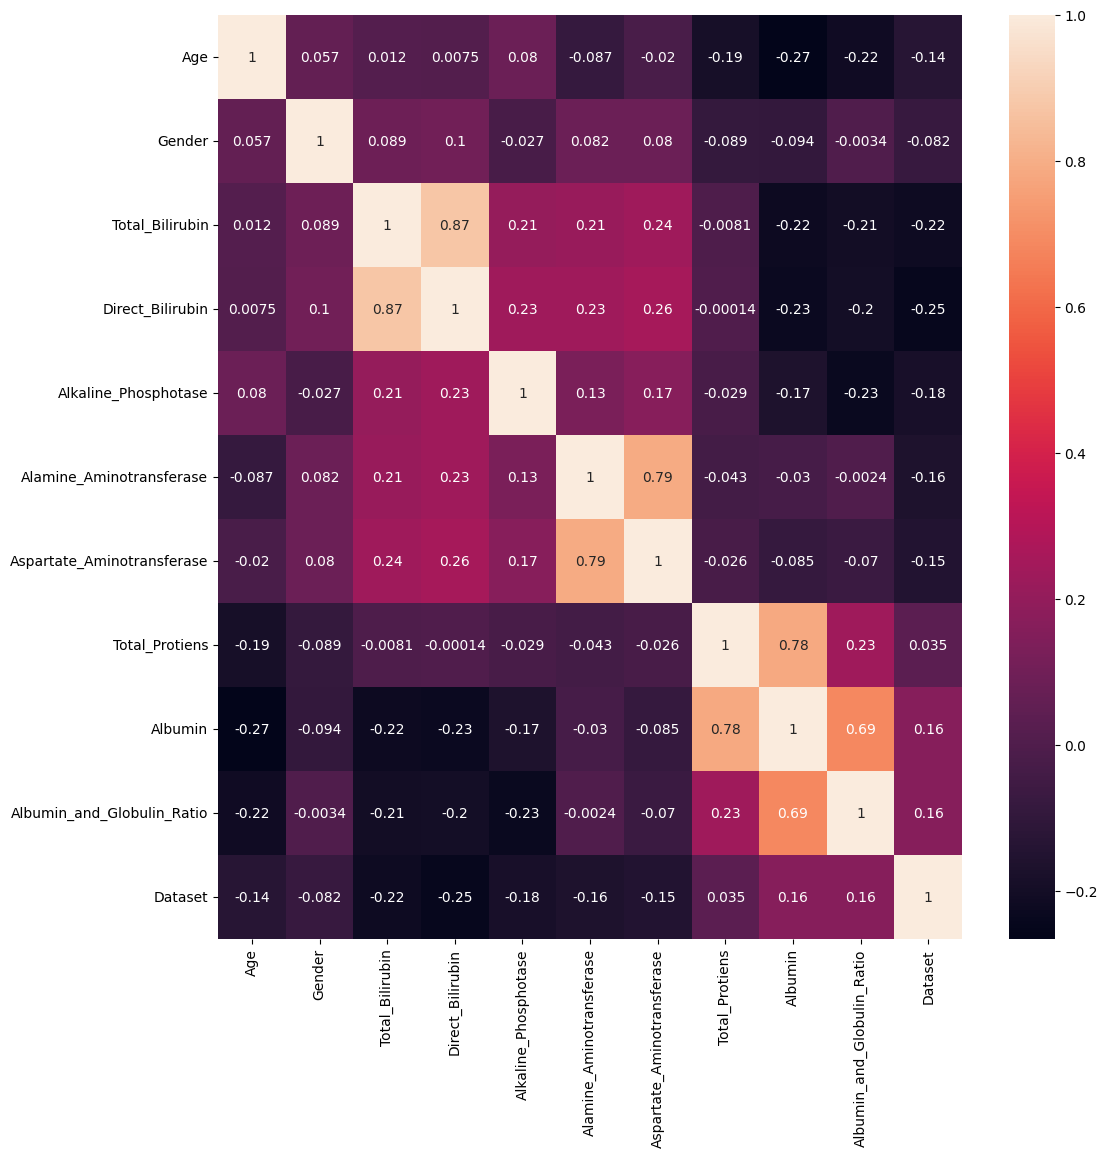

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [33]:
df.drop(columns=['Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase'],inplace=True)

In [34]:
df.columns

Index(['Age', 'Gender', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [35]:
x = df.drop(columns=['Dataset'])

In [36]:
y = df.Dataset

In [73]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.1)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [77]:
from sklearn.metrics import accuracy_score, precision_score

In [78]:
def get_clfs_results(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_predict = clf.predict(x_test)
    acc = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test, y_predict)
    return acc, precision

In [79]:
accuracy = []
precision =[]
for keys, items in clfs.items():
    a,p = get_clfs_results(items,x_train,x_test,y_train,y_test)
    accuracy.append(a)
    precision.append(p)

c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asghar Qambar Rizvi\OneDrive\Desktop\Doctor_project\DSENV\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [80]:
results = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy, 'Precision': precision}).sort_values(by='Accuracy',ascending=False)

In [81]:
results

,Algorithm,Accuracy,Precision
1,KN,0.779661,0.750000
3,DT,0.779661,0.833333
9,GBDT,0.762712,0.800000
4,LR,0.762712,0.800000
5,RF,0.728814,0.571429
0,SVC,0.711864,0.000000
8,ETC,0.711864,0.500000
7,BgC,0.711864,0.500000
6,AdaBoost,0.694915,0.444444
2,NB,0.508475,0.369565


In [82]:
knc.fit(x_train,y_train)
y_predict = knc.predict(x_test)

<Axes: >

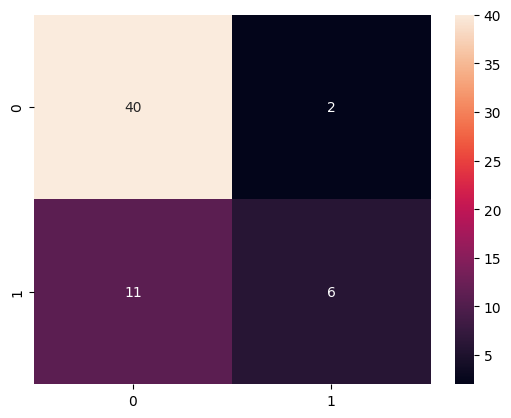

In [83]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)

In [84]:
import pickle 
with open("../models/liver.pickle",'wb') as f:
    pickle.dump(knc,f)

In [85]:
import json
column = {
    'columns': [x for x in df.columns]
}
column

{'columns': ['Age',
  'Gender',
  'Alamine_Aminotransferase',
  'Aspartate_Aminotransferase',
  'Total_Protiens',
  'Albumin',
  'Albumin_and_Globulin_Ratio',
  'Dataset']}

In [86]:
with open('../src/features/liver_columns.json','w') as f:
    f.write(json.dumps(column))